In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import scipy as sp
import pandas as pd
import seaborn as sns
from google.colab import drive
from statsmodels.tsa.stattools import adfuller

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datos = pd.read_csv("/content/drive/MyDrive/Nikkei-2010-2012.csv")

In [4]:
datos

Ticker  2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
0    4151.t       999.0       989.0      1003.0       984.0       991.0   
1    4502.t      3850.0      3870.0      3870.0      3930.0      3900.0   
2    4503.t       694.0       700.0       700.0       700.0       702.0   
3    4506.t       979.0       984.0       991.0       982.0       981.0   
4    4507.t      2003.0      2007.0      2007.0      1957.0      1930.0   
..      ...         ...         ...         ...         ...         ...   
206  9501.t      2355.0      2375.0      2375.0      2424.0      2441.0   
207  9502.t      2250.0      2259.0      2259.0      2273.0      2275.0   
208  9503.t      2119.0      2123.0      2123.0      2121.0      2131.0   
209  9531.t      1865.0      1880.0      1870.0      1885.0      1875.0   
210  9532.t      1580.0      1615.0      1625.0      1630.0      1625.0   

     2010-01-12  2010-01-13  2010-01-14  2010-01-15  ...  2012-12-14  \
0         984.0       985.0       990.0       989.0  ...       845.0   
1        3940.0      3930.0      3970.0      3970.0  ...      3805.0   
2         700.0       696.0       704.0       702.0  ...       797.0   
3         977.0       979.0       982.0       980.0  ...       999.0   
4        1931.0      1904.0      1968.0      1957.0  ...      1349.0   
..          ...         ...         ...         ...  ...         ...   
206      2445.0      2440.0      2484.0      2470.0  ...       152.0   
207      2286.0      2295.0      2308.0      2310.0  ...      1084.0   
208      2137.0      2130.0      2139.0      2128.0  ...       782.0   
209      1875.0      1880.0      1870.0      1870.0  ...      2015.0   
210      1630.0      1635.0      1635.0      1640.0  ...      1615.0   

     2012-12-17  2012-12-18  2012-12-19  2012-12-20  2012-12-21  2012-12-25  \
0         848.0       852.0       861.0       850.0       852.0       856.0   
1        3835.0      3845.0      3870.0      3875.0      3865.0      3865.0   
2         800.0       809.0       812.0       802.0       792.0       797.0   
3        1013.0      1019.0      1026.0      1012.0      1010.0      1021.0   
4        1382.0      1443.0      1462.0      1461.0      1457.0      1454.0   
..          ...         ...         ...         ...         ...         ...   
206       202.0       237.0       230.0       233.0       224.0       229.0   
207      1188.0      1147.0      1159.0      1157.0      1158.0      1177.0   
208       920.0       879.0       904.0       922.0       956.0       977.0   
209      2040.0      2030.0      2035.0      2045.0      2045.0      2030.0   
210      1620.0      1595.0      1605.0      1610.0      1605.0      1595.0   

     2012-12-26  2012-12-27  2012-12-28  
0         850.0       851.0       849.0  
1        3865.0      3860.0      3855.0  
2         798.0       780.0       775.0  
3        1032.0      1033.0      1035.0  
4        1469.0      1479.0      1437.0  
..          ...         ...         ...  
206       228.0       220.0       206.0  
207      1169.0      1162.0      1150.0  
208       967.0       952.0       907.0  
209      2025.0      2010.0      1975.0  
210      1595.0      1580.0      1570.0  

[211 rows x 737 columns]

# A) Elige dos series temporales cualquiera y haz gráficos de sus series temporales de precios y rendimientos; comenta sobre la estacionariedad al convertir los precios en rendimientos.

In [5]:
x = datos.iloc[150,0] #elegimos dos series cualquiera
y = datos.iloc[67,0]
serie1 = pd.Series(datos.iloc[150].drop(datos.columns[0]))
serie2 = pd.Series(datos.iloc[67].drop(datos.columns[0]))

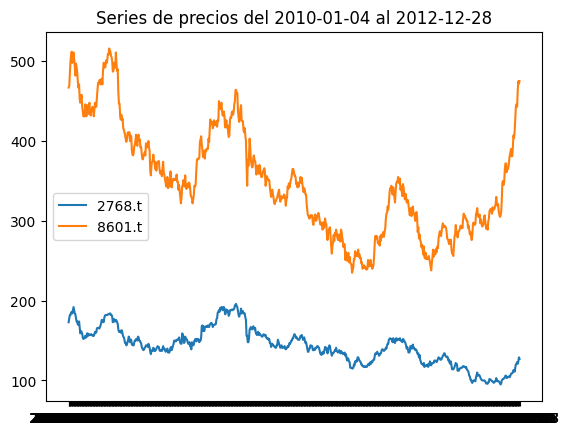

In [6]:
#serie1
plt.title(f"Series de precios del {serie1.index[0]} al {serie1.index[-1]}")
plt.plot(serie1, label = x)
plt.plot(serie2, label = y)
plt.legend()

In [7]:
p1 = adfuller(serie1)[1]
p2 = adfuller(serie2)[1]

In [8]:
p1, p2

(0.38194237051141716, 0.25188996114694884)

Vemos que ambos P values son mayores que 0.05, luego ninguna de las dos series de precios es estacionaria

In [34]:
def rendimientos(serie): #Toma una serie de tiempo y devuelve la serie de rendimientos con los mismos índices
  l = len(serie)
  Rendimientos = np.zeros(l)
  for i in range(l-1):
      Rendimientos[i+1] = (serie.iloc[i+1] - serie.iloc[i])/serie.iloc[i]
  return pd.Series(Rendimientos, index = serie.index)

In [35]:
rendimientos1 = rendimientos(serie1)
rendimientos2 = rendimientos(serie2)


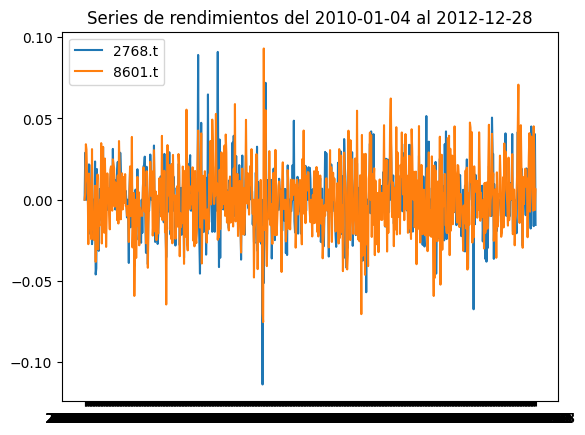

In [36]:
plt.title(f"Series de rendimientos del {serie1.index[0]} al {serie1.index[-1]}")
plt.plot(rendimientos1, label = x)
plt.plot(rendimientos2, label = y)
plt.legend()

In [37]:
p_r1 = adfuller(rendimientos1)[1]
p_r2 = adfuller(rendimientos2)[1]

In [38]:
p_r1, p_r2

(0.0, 0.0)

Vemos que ambos p values para las series de rendimientos son menores que 0.05, luego las series de rendimientos son estacionarias

# B) Grafica el mapa de calor de la matriz de correlación (usando el marco de datos de los rendimientos) y el histograma de valores propios para todo el horizonte temporal.

In [52]:
datosrend = [] #tomamos los rendimientos de las 211 emprezas
for i in range(211):
  datosrend.append(rendimientos(datos.loc[i].drop(datos.columns[0])))

In [55]:
returnsmatrix = pd.DataFrame(datosrend) #metemos los rendimientos en un dataframe

In [63]:
M = returnsmatrix.T.corr() #calculamos la matriz de correlación

<Axes: >

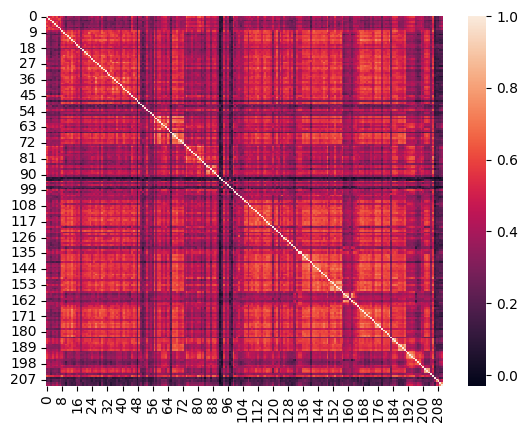

In [64]:
sns.heatmap(M)

In [67]:
eigvals_M = np.linalg.eigvals(M) #calculamos los valores propios

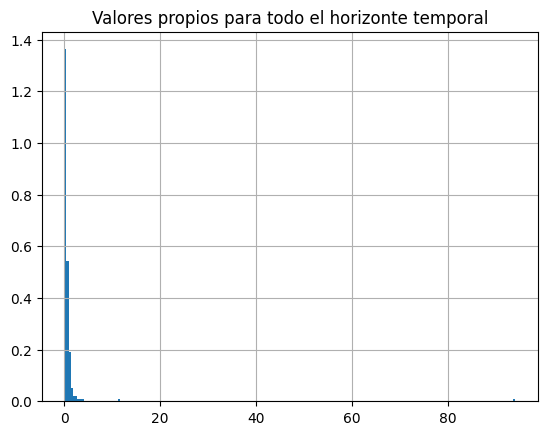

In [81]:
plt.title("Valores propios para todo el horizonte temporal")
n, bins, patches = plt.hist(eigvals_M, bins = 211, density = True)
plt.grid()


# C) Divide el horizonte temporal T en épocas de 40 días hábiles. Grafica el mapa de calor de las matrices de correlación y el histograma de valores propios para cada época. Comenta sobre la época correspondiente al período de crisis.

In [91]:
epocas = []
for i in range(18):
  epocas.append(returnsmatrix.iloc[:, i*40:i*40 + 40])
epocas.append(returnsmatrix.iloc[:, 720:736])

In [92]:
Matrices = []
for i in range(19):
  Matrices.append(epocas[i].T.corr())

In [98]:
eigenvalores = []
for i in range(19):
  eigenvalores.append(np.linalg.eigvals(Matrices[i]))

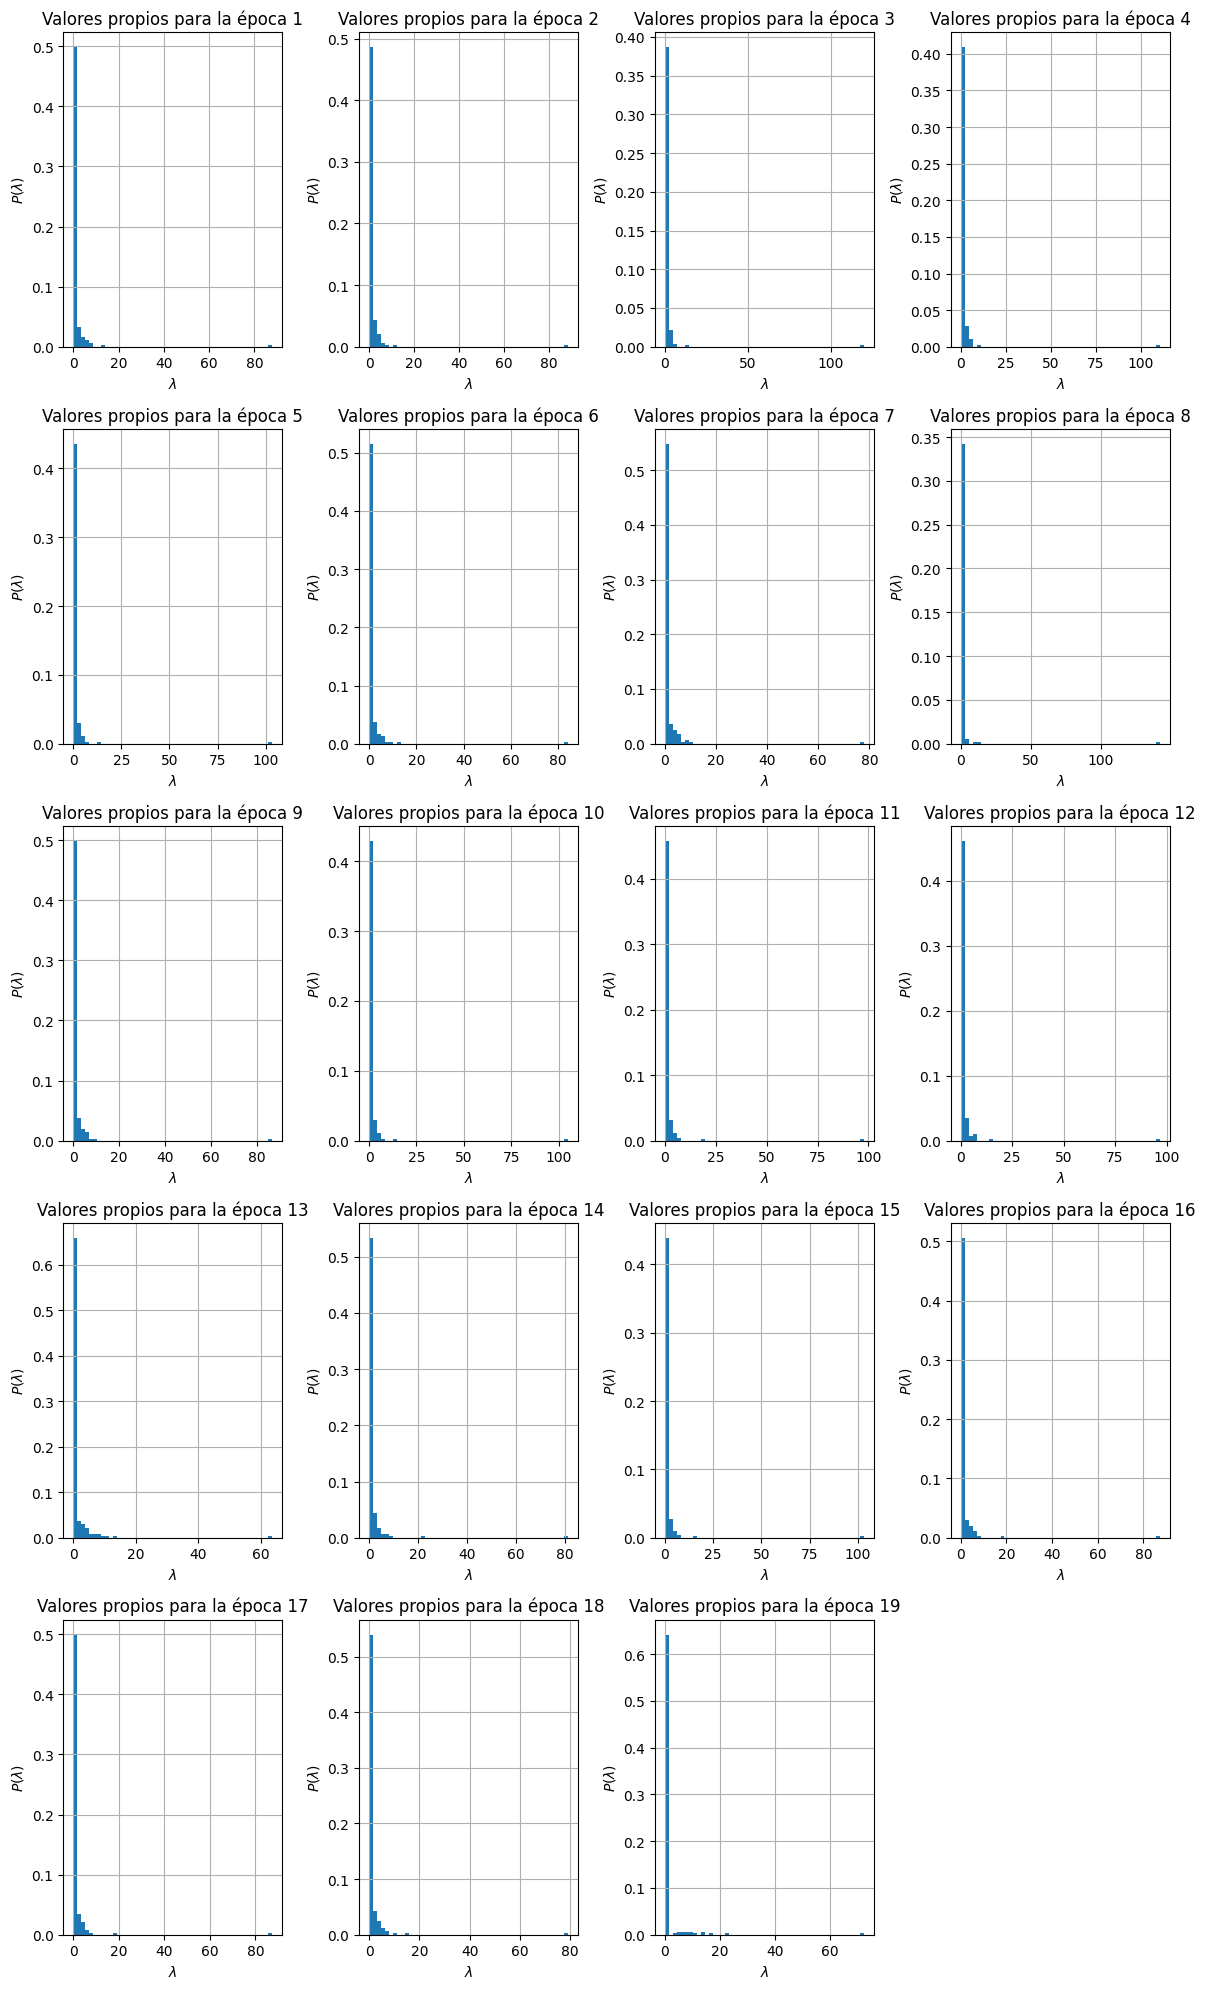

In [123]:

fig, axs = plt.subplots(5, 4, figsize=(12, 20))  # Ajustar el tamaño según sea necesario
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar el acceso
for i in range(19):
    axs[i].set_title(f"Valores propios para la época {i + 1}")
    n, bins, patches = axs[i].hist(eigenvalores[i], bins=50, density = True)
    axs[i].set_xlabel("$\\lambda$")
    axs[i].set_ylabel("$P(\\lambda)$")
    axs[i].grid()
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

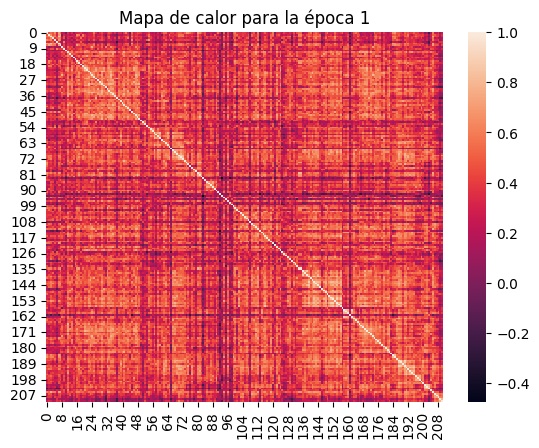

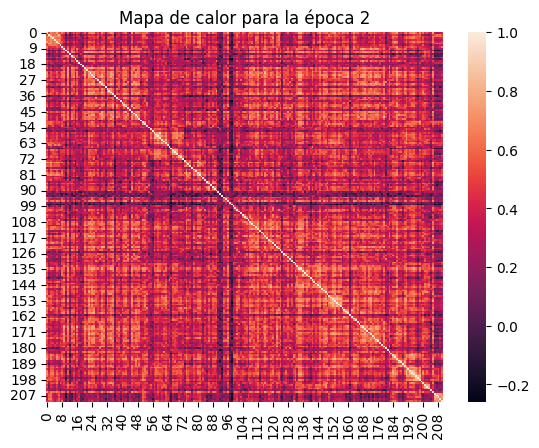

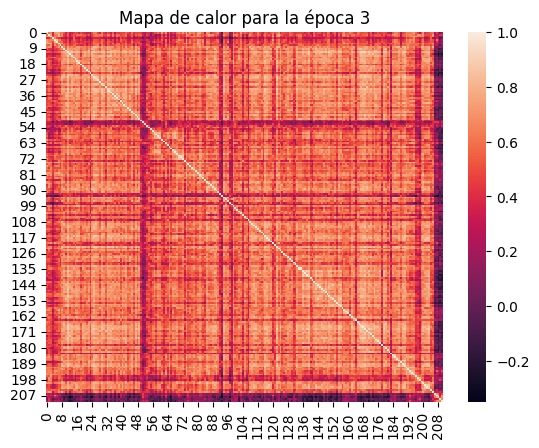

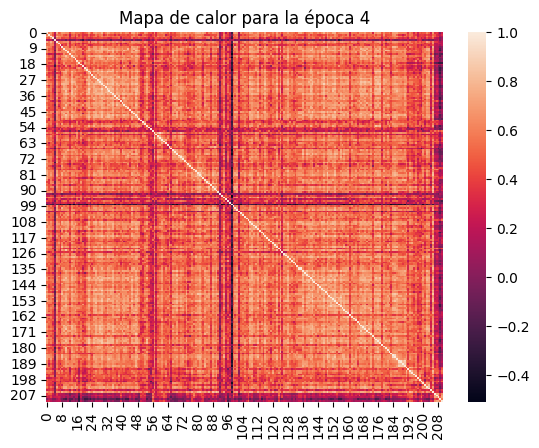

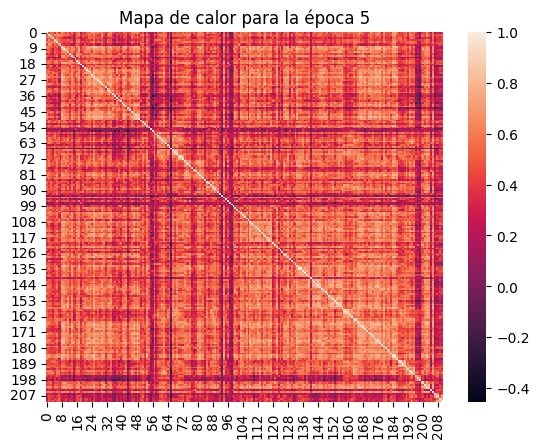

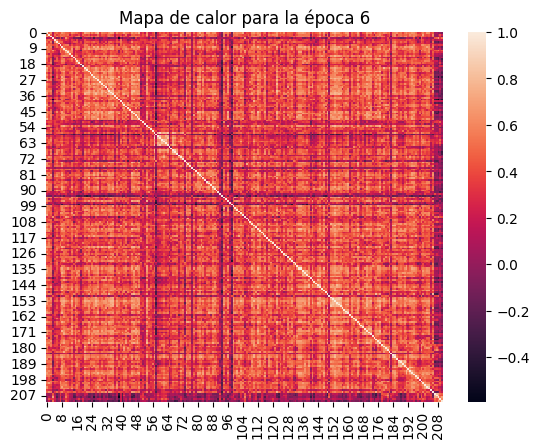

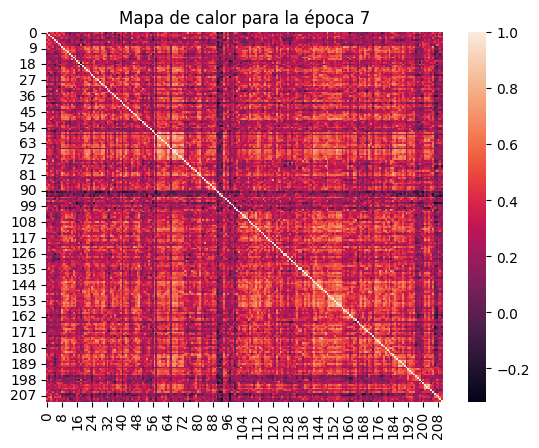

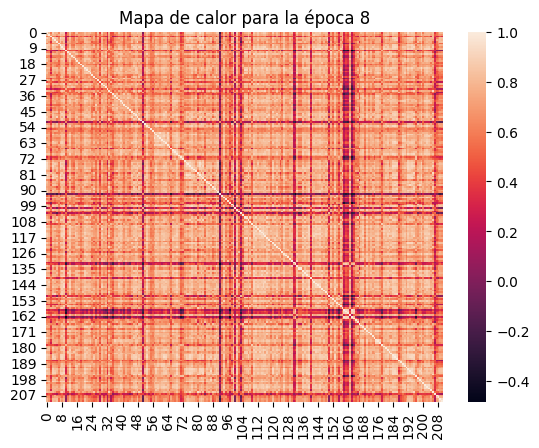

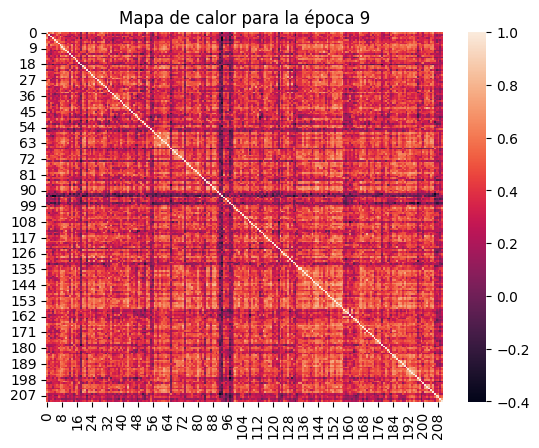

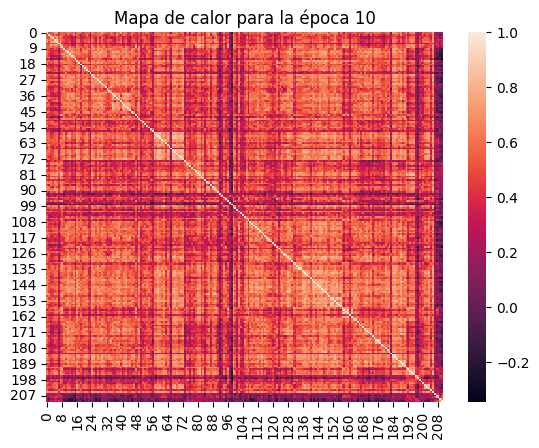

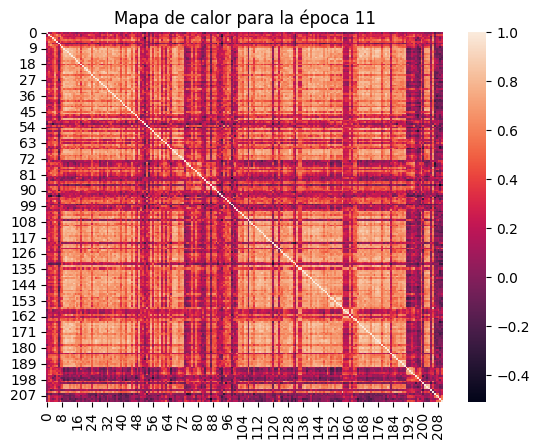

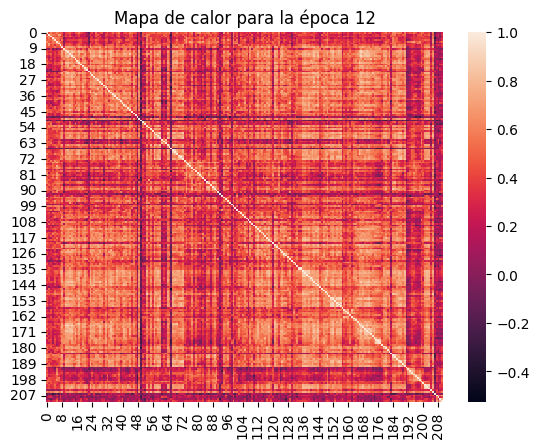

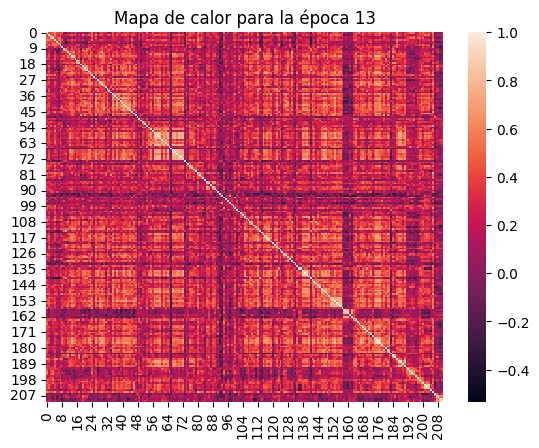

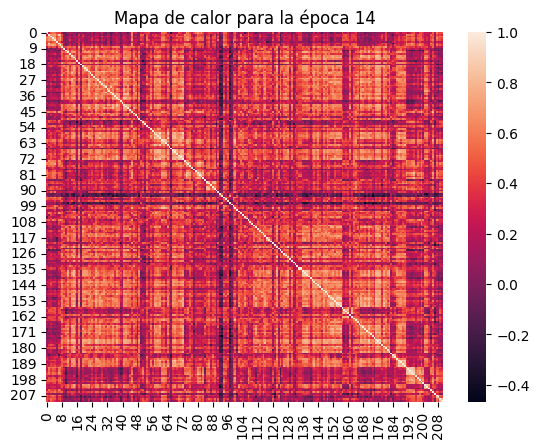

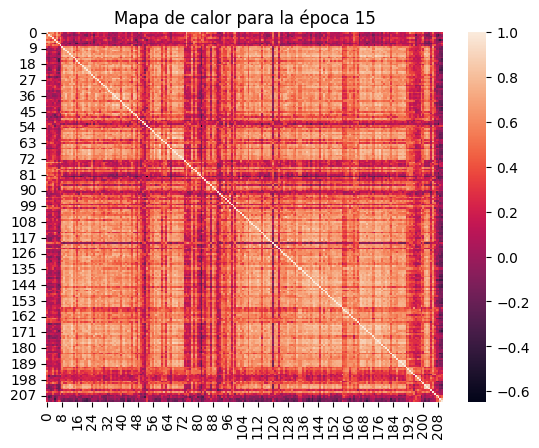

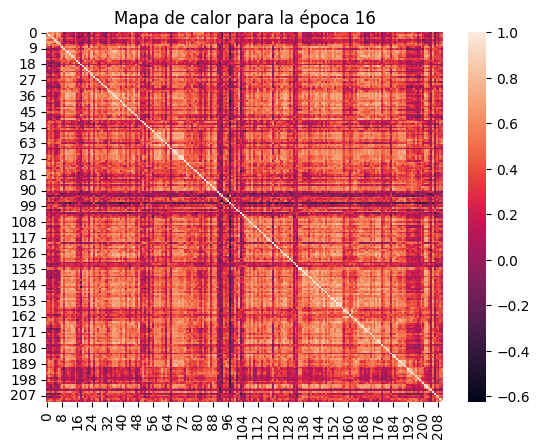

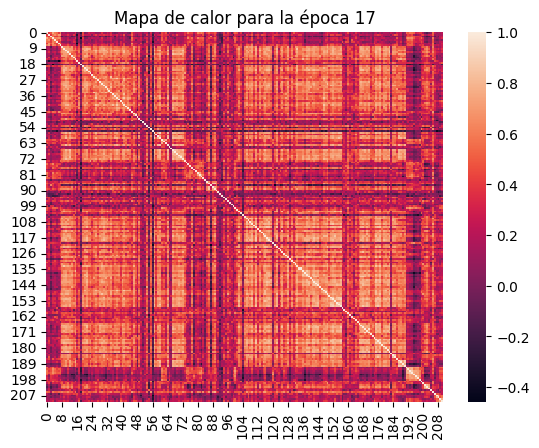

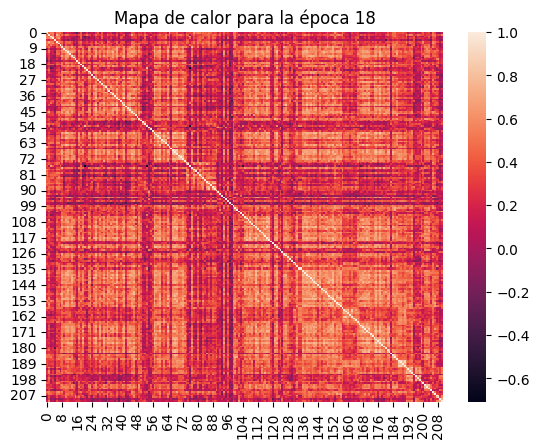

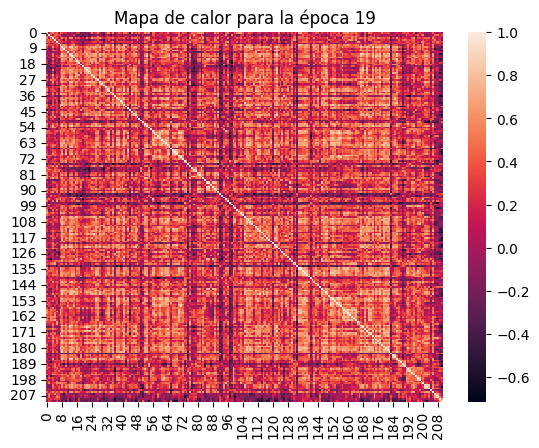

In [109]:
for i in range(19):
  plt.figure()
  plt.title(f"Mapa de calor para la época {i + 1}")
  sns.heatmap(Matrices[i])
  plt.show

Podemos asociar el periodo de crisis con la  octava época, pues su mapa de calor es más claro que los demás, es decir que las correleciones en general están más cercanas 1. Además, en su histograma de eigenvalores vemos que son prácticamente todos 0.

# D) Haz un diagrama de dispersión de las correlaciones promedio para cada época contra el valor propio más grande. Comenta sobre la tendencia observada

In [163]:
def prom_corr(matriz):
    prom = 0
    cont = 0
    for i in range(0,210, 1):
        for j in range(i+1, 210, 1):
            prom += matriz.iloc[i,j]
            cont += 1
    prom = prom/cont
    return prom

In [164]:
corrs_promedio = []
for i in range(19):
  corrs_promedio.append(prom_corr(Matrices[i]))

In [165]:
eig_max = []
for i in range(19):
  eig_max.append(max(eigenvalores[i]))

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))


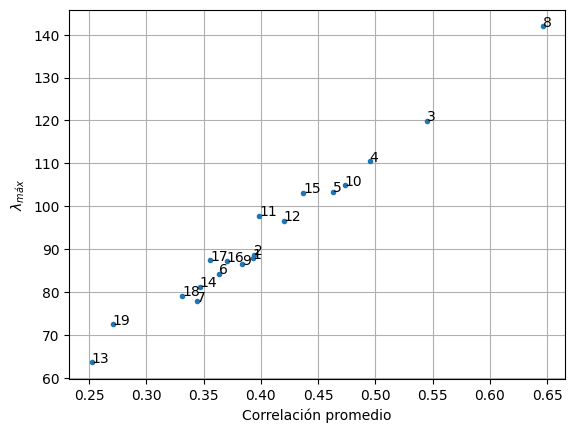

In [170]:
plt.plot(corrs_promedio, eig_max, '.')
plt.xlabel("Correlación promedio")
plt.ylabel("$\\lambda_{máx}$")
plt.grid()
for i in range(19):
  plt.annotate(f"{i+1}", (corrs_promedio[i], eig_max[i]))

Vemos que el diagrama se aproxima a una linea recta, es decir que el valor propio máximo es directamente proporcional a la correlación promedio, además, se verifica que el mayor promedio de correlación es el de la octava época